Importando as bibliotecas pandas e numpy e abrindo o arquivo notas.csv

In [13]:
# Importando bibliotecas
import pandas as pd
import numpy as np

# Carregando dataset
df = pd.read_csv('./Notas/notas.csv')

df.head()

,códigoDisciplina,nomeDisciplina,créditos,periodoCursado,SituaçãoApRep,Nota
0,ICP131,“Números Inteiros e Cripto”,4,2000/1,Aprovado,35
1,ICP132,“Fund da Computação Digital”,4,2000/1,Aprovado,45
2,ICP120,“Computação I (CC)”,5,2000/1,Aprovado,50
3,MAE111,“Cálculo Infinitesimal I”,6,2000/1,Reprovado,56
4,ICP133,“Projeto de Carreira”,4,2000/1,Aprovado,60


Verificando os tipos dos atributos

In [14]:
# Tipos de dados
df.dtypes

códigoDisciplina    object
nomeDisciplina      object
créditos             int64
periodoCursado      object
SituaçãoApRep       object
Nota                 int64
dtype: object

Contando o número de instâncias de cada atributo no dataframe

In [15]:
# Número de instâncias por atributo
df.count()

códigoDisciplina    10
nomeDisciplina      10
créditos            10
periodoCursado      10
SituaçãoApRep       10
Nota                10
dtype: int64

Avaliação preliminar da base de dados

In [16]:
# Módulo stats da biblioteca scipy
from scipy import stats

# Média Simples
mediaSimples1 = np.mean(df['Nota'])
mediaSimples2 = np.average(df['Nota'])

# Média Ponderada
mediaPonderada = np.average(df['Nota'],weights=df['créditos'])

# Mediana
medianaNotas = np.median(df['Nota'])

# Moda
Moda = stats.mode(df['Nota'],keepdims=True)

print('Média Simples1: ',mediaSimples1)
print('Média Simples2: ',mediaSimples2)
print('Média Ponderada: ',mediaPonderada)
print('Mediana: ',medianaNotas)
print('Moda - Elemento: ',Moda[0][0])
print('Moda - Frequência: ',Moda[1][0])

Média Simples1:  66.6
Média Simples2:  66.6
Média Ponderada:  67.06382978723404
Mediana:  60.5
Moda - Elemento:  90
Moda - Frequência:  2


Medida de dispersão - Quartis - Utilizando Pandas e Numpy

In [17]:
# usando Dataframe
Q1df = df['Nota'].quantile(.25)
Q2df = df['Nota'].quantile(.5)
Q3df = df['Nota'].quantile(.75)

print('Primeiro quartil: ',Q1df)
print('Segundo quartil: ',Q2df)
print('Terceiro quartil: ',Q3df)

Primeiro quartil:  51.5
Segundo quartil:  60.5
Terceiro quartil:  88.75


In [18]:
# usando Numpy
Q1numpy = np.percentile(df['Nota'], 25)
Q2numpy = np.percentile(df['Nota'], 50)
Q3numpy = np.percentile(df['Nota'], 75)

print('Primeiro quartil: ',Q1numpy)
print('Segundo quartil: ',Q2numpy)
print('Terceiro quartil: ',Q3numpy)

Primeiro quartil:  51.5
Segundo quartil:  60.5
Terceiro quartil:  88.75


Intervalo iterquartílico (IQR) utilizando a biblioteca scipy

In [19]:
from scipy.stats import iqr

IQR=iqr(df['Nota'])
print(IQR)

37.25


Gerando o gráfico boxplot

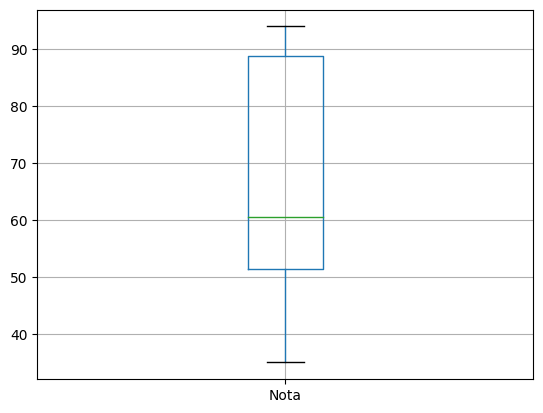

In [20]:
boxplot = df.boxplot(column=['Nota'])  

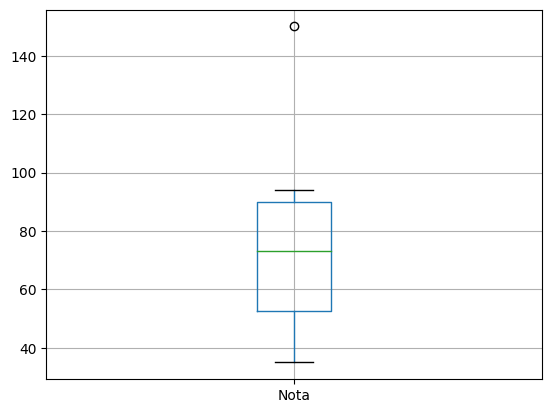

In [21]:
# Carregando dataset
df1 = pd.read_csv('./Notas/notasOutlier.csv')
boxplot = df1.boxplot(column=['Nota'])  

In [23]:
# Limite Inferior
Inferior = Q1numpy-1.5*IQR
print("Limite Inferior:",Inferior)

# Outliers - Inferior
outlierInf = df.loc[df['Nota']<= Inferior]
indicesOutlierInf = outlierInf.index  

print('Outliers Inferior')
print(df['Nota'].loc[indicesOutlierInf])

print()

# Limite Superior
Superior = Q3numpy+1.5*IQR
print("Limite Superior:",Superior)

# Outliers - Superior
outlierSup = df.loc[df['Nota']>= Superior]
indicesOutlierSup = outlierSup.index  

print('Outliers Superiores')
print(df['Nota'].loc[indicesOutlierSup]) 

# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

Limite Inferior: -4.375
Outliers Inferior
Series([], Name: Nota, dtype: int64)

Limite Superior: 144.625
Outliers Superiores
Series([], Name: Nota, dtype: int64)


Z-score

In [24]:
from scipy import stats

mediaNotas = df['Nota'].mean()
varianciaNotas = df['Nota'].var()
desvioNotas = df['Nota'].std()

print('Média: ',mediaNotas)
print('Variância: ',varianciaNotas)
print('Desvio Padrão: ',desvioNotas)
print()

# cálculo do z-score das notas
z = stats.zscore(df['Nota'])

# z-score
print('z-score')
print(z)

Média:  66.6
Variância:  456.9333333333334
Desvio Padrão:  21.375999001995986

z-score
0   -1.558258
1   -1.065138
2   -0.818579
3   -0.522707
4   -0.325459
5   -0.276147
6    0.907340
7    1.153900
8    1.153900
9    1.351148
Name: Nota, dtype: float64
